In [ ]:
                                                           KNN (K-Nearest Neighbors) 

In [ ]:
#K-Nearest Neighbors (KNN) is a supervised machine learning algorithm used for classification and regression tasks. It predicts the output for a new data point by looking at the K most similar (nearest) data points from the training set.
#In classification, it assigns the most common class among the K neighbors.
#In regression, it takes the average of the K nearest values.
#KNN is also called a lazy learning algorithm because it does not train a model explicitly—it just remembers all the data points and makes predictions based on similarity.

#How KNN Works? 
Choose the value of K (number of nearest neighbors).
Calculate the distance between the new data point and all training points (using Euclidean, Manhattan, or other distance metrics).
Find the K nearest neighbors (smallest distances).
Make a prediction:
For classification: Take a majority vote of the K nearest points.
For regression: Take the average value of the K nearest points.

In [ ]:
Dataset Overview: Car Price Prediction:
The dataset contains 205 rows and 26 columns, representing various attributes of different car models. Below is a summary of key features:


Columns Explanation:
car_ID – Unique identifier for each car.
symboling – Risk rating of the car (-2 to +3, with higher values indicating higher risk).
CarName – Name of the car (including brand and model).
fueltype – Type of fuel used (gas or diesel).
aspiration – Type of aspiration (std for standard, turbo for turbocharged).
doornumber – Number of doors (two or four).
carbody – Body style (sedan, hatchback, convertible, wagon, etc.).
drivewheel – Type of drive (fwd, rwd, 4wd).
enginelocation – Engine position (front or rear).
wheelbase – Distance between front and rear wheels (in inches).
carlength – Length of the car (in inches).
carwidth – Width of the car (in inches).
carheight – Height of the car (in inches).
curbweight – Weight of the car without passengers or cargo (in pounds).
enginetype – Type of engine (ohc, ohcv, rotor, etc.).
cylindernumber – Number of cylinders (two, four, six, etc.).
enginesize – Size of the engine (in cubic centimeters).
fuelsystem – Type of fuel system (mpfi, 2bbl, 1bbl, etc.).
boreratio – Ratio of the cylinder bore diameter to the stroke length.
stroke – Length of the piston stroke within the cylinder.
compressionratio – Ratio of the cylinder’s maximum to minimum volume.
horsepower – Power output of the engine.
peakrpm – RPM at which the engine produces peak power.
citympg – Fuel efficiency in city driving (miles per gallon).
highwaympg – Fuel efficiency on the highway (miles per gallon).
price – Selling price of the car (target variable).


Columns Overview:
1)ID and Metadata:
a)car_ID: Unique identifier for each car.
b)CarName: Name of the car.

2)Categorical Features:fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, enginetype, cylindernumber, fuelsystem.

3)Numerical Features:symboling, wheelbase, carlength, carwidth, carheight, curbweight, enginesize, boreratio, stroke, compressionratio, horsepower, peakrpm, citympg, highwaympg, price.


Key Observations:
The dataset contains both categorical (e.g., CarName, fueltype) and numerical features (e.g., horsepower, price).
The "price" column is the target variable for prediction.
The dataset seems clean, with no missing values.

Our Goal:
a)Train a KNN model on historical car price data.
b)Predict car prices for unseen data.
c)Evaluate performance and tune hyperparameters to improve accuracy.

                                         

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [21]:
car_data=pd.read_csv(r"C:\Users\vaibh\OneDrive\Desktop\File\ML\File\CarPrice_Assignment.csv")

In [23]:
car_data.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.000
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.000
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710.000
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920.000
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875.000
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167


In [25]:
print(car_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [27]:
# Check for missing values and data types
car_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [29]:
car_data.shape

(205, 26)

In [31]:
# Summary statistics
car_data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
#PROCESS THE DATA

In [33]:
# Encode categorical features
categorical_columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 
                       'drivewheel', 'enginelocation', 'enginetype', 
                       'cylindernumber', 'fuelsystem']

In [41]:
#we are storing the encoder object for each categorical column in the label_encoders dictionary.
#This allows us to reuse the encoder later for decoding or transforming new data in the same way.


label_encoders = {}#initializing an empty dictionary to store label encoders for categorical columns.
for col in categorical_columns:
    le = LabelEncoder()#is creating an instance/object of LabelEncoder() from sklearn.preprocessing
    car_data[col] = le.fit_transform(car_data[col])# converts categorical values into numerical labels using LabelEncoder() and stores the transformed data back into the DataFrame.
    label_encoders[col] = le  # Stores the LabelEncoder() object for a specific column in a dictionary called label_encoders.



In [39]:
# Drop unnecessary columns
car_data_processed = car_data.drop(columns=['car_ID', 'CarName'])

In [51]:
car_data_processed.head(5)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,0,1,2,2,0,94.5,171.2,65.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,3,1,0,99.8,176.6,66.2,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,3,0,0,99.4,176.6,66.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [43]:
# Normalize numerical features
scaler = StandardScaler()
numerical_columns = ['symboling', 'wheelbase', 'carlength', 'carwidth', 
                     'carheight', 'curbweight', 'enginesize', 'boreratio', 
                     'stroke', 'compressionratio', 'horsepower', 'peakrpm', 
                     'citympg', 'highwaympg', 'price']
car_data_processed[numerical_columns] = scaler.fit_transform(car_data_processed[numerical_columns])

In [55]:
# Display the first few rows of the processed dataset
car_data_processed.head(5)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.743470,1,0,1,0,2,0,-1.690772,-0.426521,-0.844782,...,0.074449,5,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.027391
1,1.743470,1,0,1,0,2,0,-1.690772,-0.426521,-0.844782,...,0.074449,5,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.404461
2,0.133509,1,0,1,2,2,0,-0.708596,-0.231513,-0.190566,...,0.604046,5,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,0.404461
3,0.938490,1,0,0,3,1,0,0.173698,0.207256,0.136542,...,-0.431076,5,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,0.084485
4,0.938490,1,0,0,3,0,0,0.107110,0.207256,0.230001,...,0.218885,5,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,0.523668


In [ ]:
#SPLIT THE DATA

In [57]:
# Features and target variable
X = pd.DataFrame(car_data_processed.iloc[:,:-1])# features
y = pd.DataFrame(car_data_processed.iloc[:,-1]) #target


In [59]:
X

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1.743470,1,0,1,0,2,0,-1.690772,-0.426521,-0.844782,...,2,0.074449,5,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
1,1.743470,1,0,1,0,2,0,-1.690772,-0.426521,-0.844782,...,2,0.074449,5,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059
2,0.133509,1,0,1,2,2,0,-0.708596,-0.231513,-0.190566,...,3,0.604046,5,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627
3,0.938490,1,0,0,3,1,0,0.173698,0.207256,0.136542,...,2,-0.431076,5,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354
4,0.938490,1,0,0,3,0,0,0.107110,0.207256,0.230001,...,1,0.218885,5,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,1,0,0,3,2,0,1.721873,1.198549,1.398245,...,2,0.339248,5,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.340094,-0.400490
201,-1.476452,1,1,0,3,2,0,1.721873,1.198549,1.351515,...,2,0.339248,5,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.953012,-0.837195
202,-1.476452,1,0,0,3,2,0,1.721873,1.198549,1.398245,...,3,1.109571,5,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.106241,-1.128332
203,-1.476452,0,1,0,3,2,0,1.721873,1.198549,1.398245,...,3,0.435538,3,-1.183483,0.462183,3.244916,0.047732,-0.683286,0.119594,-0.546059


In [61]:
y

,price
0,0.027391
1,0.404461
2,0.404461
3,0.084485
4,0.523668
...,...
200,0.447752
201,0.723810
202,1.029983
203,1.153582


In [65]:
from sklearn.model_selection import train_test_split

In [67]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Check the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((164, 23), (41, 23), (164, 1), (41, 1))

In [ ]:
#TRAIN THE KNN Regressor

In [73]:
from sklearn.neighbors import KNeighborsRegressor

In [75]:
# Initialize the KNN regressor with k=5
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [77]:
# Train the model
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [79]:
# Make predictions on the test set
y_pred = knn_regressor.predict(X_test)

In [81]:
y_pred

array([[ 0.89315882],
       [ 0.21957761],
       [-0.50469785],
       [ 0.1738273 ],
       [ 0.77801759],
       [-0.85443808],
       [-0.5797605 ],
       [-0.74785465],
       [ 0.15924642],
       [-0.43051358],
       [ 0.13806525],
       [-0.78391784],
       [ 0.28839131],
       [ 0.17028874],
       [ 2.52782295],
       [-0.86856722],
       [-0.8690566 ],
       [-0.10898144],
       [-0.51850075],
       [ 0.15924642],
       [-0.41420107],
       [ 0.64204654],
       [-0.88942214],
       [-0.8736492 ],
       [-0.79975353],
       [ 0.94596116],
       [-0.18893784],
       [ 0.61577085],
       [-0.76785629],
       [ 0.61815499],
       [ 0.76145412],
       [-0.83539009],
       [-0.6387114 ],
       [ 0.50266241],
       [-0.56849232],
       [ 0.89684796],
       [ 0.15924642],
       [ 0.0112794 ],
       [-0.78842261],
       [-0.10898144],
       [-0.68508913]])

In [ ]:
#HYPERPARAMETERS

In [83]:
from sklearn.metrics import mean_squared_error, r2_score

In [87]:
# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.38039861051798307
R-squared: 0.6939694570256789


In [89]:
from sklearn.model_selection import GridSearchCV

In [91]:
# Define parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}

In [93]:
# Grid search with cross-validation
grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [115]:
# Best parameters 
best_params = grid.best_params_
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

In [ ]:
#Model Evaluation
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best Parameters: {best_params}")
print(f"Tuned Mean Squared Error: {mse_best}")
print(f"Tuned R-squared: {r2_best}")

In [107]:
print("y_test:", y_test.values[:5])  # Check the first 5 values
print("y_pred:", y_pred[:5])         # Check the first 5 predicted values


y_test: [[ 2.19381802]
 [ 0.57501053]
 [-0.46775629]
 [-0.17902486]
 [ 1.87861013]]
y_pred: [[ 0.89315882]
 [ 0.21957761]
 [-0.50469785]
 [ 0.1738273 ]
 [ 0.77801759]]


In [109]:
y_pred = knn_regressor.predict(X_test)


In [111]:
y_pred

array([[ 0.89315882],
       [ 0.21957761],
       [-0.50469785],
       [ 0.1738273 ],
       [ 0.77801759],
       [-0.85443808],
       [-0.5797605 ],
       [-0.74785465],
       [ 0.15924642],
       [-0.43051358],
       [ 0.13806525],
       [-0.78391784],
       [ 0.28839131],
       [ 0.17028874],
       [ 2.52782295],
       [-0.86856722],
       [-0.8690566 ],
       [-0.10898144],
       [-0.51850075],
       [ 0.15924642],
       [-0.41420107],
       [ 0.64204654],
       [-0.88942214],
       [-0.8736492 ],
       [-0.79975353],
       [ 0.94596116],
       [-0.18893784],
       [ 0.61577085],
       [-0.76785629],
       [ 0.61815499],
       [ 0.76145412],
       [-0.83539009],
       [-0.6387114 ],
       [ 0.50266241],
       [-0.56849232],
       [ 0.89684796],
       [ 0.15924642],
       [ 0.0112794 ],
       [-0.78842261],
       [-0.10898144],
       [-0.68508913]])

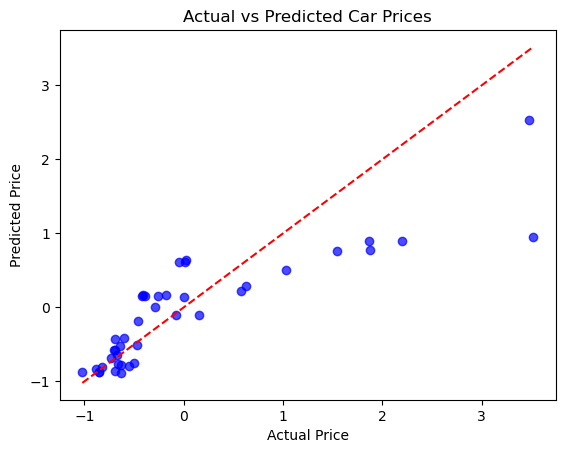

In [113]:
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()
